<a href="https://colab.research.google.com/github/NgBlaze/HNGx/blob/main/GeoSpatial_task_stage_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv('Anambra Election Data.csv')  # Replace with your actual file path

# Display first few rows and column names to understand the dataset
print(df.head())
print(df.columns)

# Verify data types and check for any missing values
print(df.info())

# Convert Latitude and Longitude to Point objects for geospatial analysis
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

import pandas as pd
import folium

# Load the dataset
df = pd.read_csv('Anambra Election Data.csv')  # Replace with your actual file path

# Initialize the map centered around a specific location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Define colors for each party
party_colors = {
    'APC': 'blue',
    'LP': 'green',
    'PDP': 'red',
    'NNPP': 'orange'
}

# Add markers for each polling unit, color-coded by party votes
for index, row in df.iterrows():
    # Determine marker color based on party with the most votes
    max_party = max(row['APC'], row['LP'], row['PDP'], row['NNPP'])
    if row['APC'] == max_party:
        color = party_colors['APC']
    elif row['LP'] == max_party:
        color = party_colors['LP']
    elif row['PDP'] == max_party:
        color = party_colors['PDP']
    else:
        color = party_colors['NNPP']

    # Define popup content
    popup = f"<b>Polling Unit:</b> {row['Address']}<br>" \
            f"<b>APC Votes:</b> {row['APC']}<br>" \
            f"<b>LP Votes:</b> {row['LP']}<br>" \
            f"<b>PDP Votes:</b> {row['PDP']}<br>" \
            f"<b>NNPP Votes:</b> {row['NNPP']}"

    # Add marker to the map
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=popup, icon=folium.Icon(color=color)).add_to(m)

# Add legends for party colors
for party, color in party_colors.items():
    folium.Marker(
        location=[0, 0],
        popup=party,
        icon=folium.Icon(color=color),
        tooltip=party
    ).add_to(m)

# Add layer control to toggle party legends
folium.LayerControl().add_to(m)

# Save the map as an HTML file (optional)
m.save('polling_units_map_with_legends.html')




                                Address  Latitude  Longitude  APC   LP  PDP  \
0  ST. CHARLE'S SCHOOL, AGUATA, ANAMBRA  6.008584   7.100949    0    0    0   
1       AMANKWU SQUARE, AGUATA, ANAMBRA  6.008584   7.100949    3  142    0   
2     COOPERATIVE HALL, AGUATA, ANAMBRA  6.008584   7.100949    0    0    0   
3      OCHIEOBU SQUARE, AGUATA, ANAMBRA  6.008584   7.100949    0  124    4   
4    OYE MOTOR PARK II, AGUATA, ANAMBRA  5.965620   7.119106    4   57    0   

   NNPP  
0     0  
1     1  
2     0  
3     1  
4     0  
Index(['Address', 'Latitude', 'Longitude', 'APC', 'LP', 'PDP', 'NNPP'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3679 entries, 0 to 3678
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    3679 non-null   object 
 1   Latitude   3679 non-null   float64
 2   Longitude  3679 non-null   float64
 3   APC        3679 non-null   int64  
 4   LP         3679 non-null  

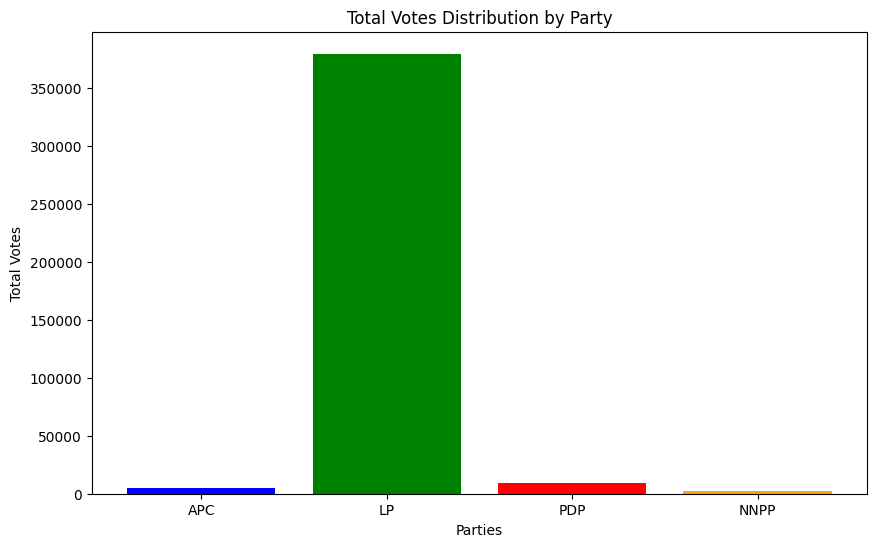

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate total votes for each party
total_votes_apc = df['APC'].sum()
total_votes_lp = df['LP'].sum()
total_votes_pdp = df['PDP'].sum()
total_votes_nnpp = df['NNPP'].sum()

# Create a bar plot for party-wise distribution
parties = ['APC', 'LP', 'PDP', 'NNPP']
total_votes = [total_votes_apc, total_votes_lp, total_votes_pdp, total_votes_nnpp]

plt.figure(figsize=(10, 6))
plt.bar(parties, total_votes, color=['blue', 'green', 'red', 'orange'])
plt.title('Total Votes Distribution by Party')
plt.xlabel('Parties')
plt.ylabel('Total Votes')

plt.show()


In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import distance_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm



# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Ensure the GeoDataFrame uses a metric CRS (e.g., EPSG:3857)
gdf = gdf.set_crs("EPSG:4326")  # WGS84
gdf = gdf.to_crs("EPSG:3857")   # Metric CRS

# Calculate the distance matrix with tqdm for progress visualization
coords = gdf.geometry.apply(lambda x: (x.x, x.y))
dist_matrix = distance_matrix(coords.tolist(), coords.tolist())


# After visualizing, you can choose an appropriate distance threshold
distance_threshold = 1000  # Example threshold in meters

# Identify neighbours within the distance threshold
neighbours = []
for i, distances in tqdm(enumerate(dist_matrix), total=len(dist_matrix), desc="Identifying neighbours"):
    neighbour_indices = [j for j, d in enumerate(distances) if 0 < d <= distance_threshold]
    neighbours.append((gdf.iloc[i]['Address'], [gdf.iloc[j]['Address'] for j in neighbour_indices]))

# Create a DataFrame of neighbouring polling units
neighbours_df = pd.DataFrame(neighbours, columns=['Address', 'Neighbours'])

# Display the result
print(neighbours_df)


Identifying neighbours: 100%|██████████| 3679/3679 [00:13<00:00, 282.22it/s]


                                                Address  \
0                  ST. CHARLE'S SCHOOL, AGUATA, ANAMBRA   
1                       AMANKWU SQUARE, AGUATA, ANAMBRA   
2                     COOPERATIVE HALL, AGUATA, ANAMBRA   
3                      OCHIEOBU SQUARE, AGUATA, ANAMBRA   
4                    OYE MOTOR PARK II, AGUATA, ANAMBRA   
...                                                 ...   
3674  NODU VILLAGE HALL VII (OPEN SPACE OPPOSITE NOD...   
3675  NIGERIA UNION OF JOURNALISTS PREMISES (OPEN SP...   
3676        OKOCHI VILLAGE HALL II, AWKA SOUTH, ANAMBRA   
3677  UMUNNACHI EBENATO UDENE VILL. HALL, NNEWI SOUT...   
3678    OGENEUNADIKE VILLAGE HALL, NNEWI SOUTH, ANAMBRA   

                                             Neighbours  
0     [COMMUNITY PRY. SCHOOL I, AGUATA, ANAMBRA, COM...  
1     [COMMUNITY PRY. SCHOOL I, AGUATA, ANAMBRA, COM...  
2     [COMMUNITY PRY. SCHOOL I, AGUATA, ANAMBRA, COM...  
3     [COMMUNITY PRY. SCHOOL I, AGUATA, ANAMBRA, COM...  
4

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import distance_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm



# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Ensure the GeoDataFrame uses a metric CRS (e.g., EPSG:3857)
gdf = gdf.set_crs("EPSG:4326")  # WGS84
gdf = gdf.to_crs("EPSG:3857")   # Metric CRS

# Calculate the distance matrix with tqdm for progress visualization
coords = gdf.geometry.apply(lambda x: (x.x, x.y))
dist_matrix = distance_matrix(coords.tolist(), coords.tolist())




distance_threshold = 1000  # Example threshold in meters

# Identify neighbours within the distance threshold
neighbours = []
for i, distances in tqdm(enumerate(dist_matrix), total=len(dist_matrix), desc="Identifying neighbours"):
    neighbour_indices = [j for j, d in enumerate(distances) if 0 < d <= distance_threshold]
    neighbours.append((gdf.iloc[i]['Address'], [gdf.iloc[j]['Address'] for j in neighbour_indices]))

# Create a DataFrame of neighbouring polling units
neighbours_df = pd.DataFrame(neighbours, columns=['Address', 'Neighbours'])

# Display the result
print(neighbours_df)


Identifying neighbours: 100%|██████████| 3679/3679 [00:08<00:00, 436.97it/s]

                                                Address  \
0                  ST. CHARLE'S SCHOOL, AGUATA, ANAMBRA   
1                       AMANKWU SQUARE, AGUATA, ANAMBRA   
2                     COOPERATIVE HALL, AGUATA, ANAMBRA   
3                      OCHIEOBU SQUARE, AGUATA, ANAMBRA   
4                    OYE MOTOR PARK II, AGUATA, ANAMBRA   
...                                                 ...   
3674  NODU VILLAGE HALL VII (OPEN SPACE OPPOSITE NOD...   
3675  NIGERIA UNION OF JOURNALISTS PREMISES (OPEN SP...   
3676        OKOCHI VILLAGE HALL II, AWKA SOUTH, ANAMBRA   
3677  UMUNNACHI EBENATO UDENE VILL. HALL, NNEWI SOUT...   
3678    OGENEUNADIKE VILLAGE HALL, NNEWI SOUTH, ANAMBRA   

                                             Neighbours  
0     [COMMUNITY PRY. SCHOOL I, AGUATA, ANAMBRA, COM...  
1     [COMMUNITY PRY. SCHOOL I, AGUATA, ANAMBRA, COM...  
2     [COMMUNITY PRY. SCHOOL I, AGUATA, ANAMBRA, COM...  
3     [COMMUNITY PRY. SCHOOL I, AGUATA, ANAMBRA, COM...  
4

In [10]:

#Calculate z-score for each party in each polling unit

import numpy as np

# Example: Calculate z-score for each party in each polling unit
parties = ['APC', 'LP', 'PDP', 'NNPP']  # Example parties, adjust as per your dataset
for party in parties:
    # Calculate mean and standard deviation of votes for the party in neighbouring units
    neighbours_df[f'{party}_mean'] = neighbours_df['Neighbours'].apply(
        lambda neighbours: np.mean([df.loc[df['Address'] == neighbour][party].values[0] for neighbour in neighbours if neighbour != gdf.iloc[i]['Address']]))
    neighbours_df[f'{party}_std'] = neighbours_df['Neighbours'].apply(
        lambda neighbours: np.std([df.loc[df['Address'] == neighbour][party].values[0] for neighbour in neighbours if neighbour != gdf.iloc[i]['Address']]))

    # Calculate z-score for the party in each polling unit
    gdf[f'{party}_zscore'] = (df[party] - neighbours_df[f'{party}_mean']) / neighbours_df[f'{party}_std']

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=ou

In [11]:
# Example: Identify outliers based on z-score threshold (adjust threshold as needed)
outlier_threshold = 2.0
for party in parties:
    gdf[f'{party}_outlier'] = gdf[f'{party}_zscore'].apply(lambda z: True if abs(z) > outlier_threshold else False)


In [12]:
# Display the DataFrame with outlier scores
print(gdf[['Address', 'APC_zscore', 'LP_zscore', 'PDP_zscore', 'NNPP_zscore', 'APC_outlier', 'LP_outlier', 'PDP_outlier', 'NNPP_outlier']])

                                                Address  APC_zscore  \
0                  ST. CHARLE'S SCHOOL, AGUATA, ANAMBRA   -0.426006   
1                       AMANKWU SQUARE, AGUATA, ANAMBRA    1.582310   
2                     COOPERATIVE HALL, AGUATA, ANAMBRA   -0.426006   
3                      OCHIEOBU SQUARE, AGUATA, ANAMBRA   -0.426006   
4                    OYE MOTOR PARK II, AGUATA, ANAMBRA         NaN   
...                                                 ...         ...   
3674  NODU VILLAGE HALL VII (OPEN SPACE OPPOSITE NOD...   -0.707107   
3675  NIGERIA UNION OF JOURNALISTS PREMISES (OPEN SP...   -0.036364   
3676        OKOCHI VILLAGE HALL II, AWKA SOUTH, ANAMBRA        -inf   
3677  UMUNNACHI EBENATO UDENE VILL. HALL, NNEWI SOUT...         inf   
3678    OGENEUNADIKE VILLAGE HALL, NNEWI SOUTH, ANAMBRA         NaN   

      LP_zscore  PDP_zscore  NNPP_zscore  APC_outlier  LP_outlier  \
0     -2.026735   -0.693375    -0.471405        False        True   
1      1.

In [ ]:
# Create a base map centered around a location (e.g., Nigeria)
m = folium.Map(location=[9.0820, 8.6753], zoom_start=6)

# Add choropleth layer for each party
for party, color in zip(['APC', 'LP', 'PDP', 'NNPP'], ['YlOrRd', 'YlGn', 'PuRd', 'YlOrBr']):
    folium.Choropleth(
        geo_data=gdf,
        data=gdf,
        columns=['Address', party],
        key_on='feature.properties.Address',
        fill_color=color,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Votes for {party}',
        highlight=True,
        name=f'{party} Party'  # Optional: Specify layer name
    ).add_to(m)

# Display the map
m.save('voting_map.html')  # Save the map to an HTML file

In [21]:
gdf[['Address', 'APC_zscore', 'LP_zscore', 'PDP_zscore', 'NNPP_zscore', 'APC_outlier', 'LP_outlier', 'PDP_outlier', 'NNPP_outlier']].to_csv('output_file.csv', index=False)


Overview Statistics for Z-scores:
        APC_zscore    LP_zscore   PDP_zscore  NNPP_zscore
count  1754.000000  2052.000000  1874.000000  1718.000000
mean           NaN          NaN          NaN          NaN
std            NaN          NaN          NaN          NaN
min           -inf         -inf         -inf         -inf
25%      -0.612372    -0.925612    -0.693375    -0.637815
50%      -0.423121    -0.172845    -0.241933    -0.449448
75%       1.287453     0.799403     0.915401     0.523205
max            inf          inf          inf          inf


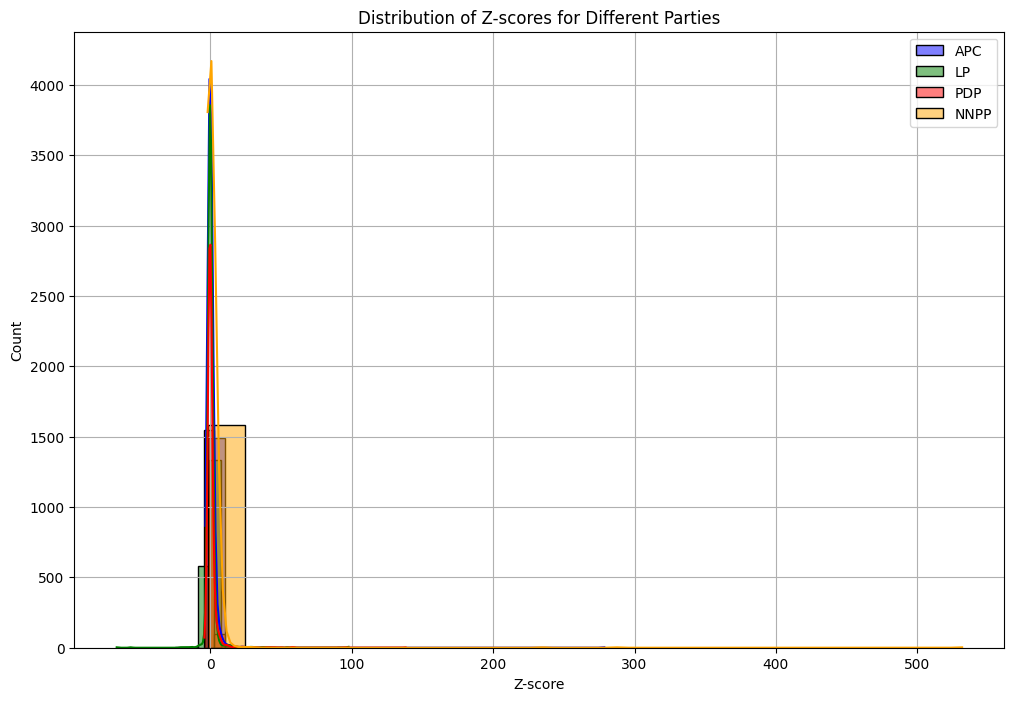


### Explanation: Overview Statistics and Distribution ###

The overview statistics provide a summary of the distribution of z-scores across all polling units for each party.
These statistics include measures such as mean, standard deviation, minimum, maximum, and quartiles.
The distribution plots visualize how the z-scores are distributed for each party.
They show the spread and concentration of voting pattern deviations from neighbouring units, which helps in understanding the variability and potential outliers.

Percentage of Outliers for Each Party:
APC_outlier     10.546344
LP_outlier      10.356075
PDP_outlier     10.165806
NNPP_outlier     7.746670
dtype: float64

### Explanation: Percentage of Outliers ###

The percentage of outliers for each party indicates the proportion of polling units where significant deviations in voting patterns are observed compared to neighbouring units.
Higher percentages suggest more widespread anomalies in voting behaviors, which may warrant closer

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix
import numpy as np
from tqdm import tqdm

# Load your DataFrame with z-scores and outlier flags
df = pd.read_csv('output_file.csv')

# Overview statistics
overview_stats = df[['APC_zscore', 'LP_zscore', 'PDP_zscore', 'NNPP_zscore']].describe()
print("Overview Statistics for Z-scores:")
print(overview_stats)

# Distribution of z-scores for each party
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='APC_zscore', kde=True, bins=20, color='blue', label='APC')
sns.histplot(data=df, x='LP_zscore', kde=True, bins=20, color='green', label='LP')
sns.histplot(data=df, x='PDP_zscore', kde=True, bins=20, color='red', label='PDP')
sns.histplot(data=df, x='NNPP_zscore', kde=True, bins=20, color='orange', label='NNPP')
plt.title('Distribution of Z-scores for Different Parties')
plt.xlabel('Z-score')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Explanation for Overview Statistics and Distribution
print("\n### Explanation: Overview Statistics and Distribution ###\n")
print("The overview statistics provide a summary of the distribution of z-scores across all polling units for each party.")
print("These statistics include measures such as mean, standard deviation, minimum, maximum, and quartiles.")
print("The distribution plots visualize how the z-scores are distributed for each party.")
print("They show the spread and concentration of voting pattern deviations from neighbouring units, which helps in understanding the variability and potential outliers.")

# Percentage of outliers for each party
outlier_percentage = df[['APC_outlier', 'LP_outlier', 'PDP_outlier', 'NNPP_outlier']].mean() * 100
print("\nPercentage of Outliers for Each Party:")
print(outlier_percentage)

# Explanation for Percentage of Outliers
print("\n### Explanation: Percentage of Outliers ###\n")
print("The percentage of outliers for each party indicates the proportion of polling units where significant deviations in voting patterns are observed compared to neighbouring units.")
print("Higher percentages suggest more widespread anomalies in voting behaviors, which may warrant closer scrutiny and investigation.")



# Explanation for Visualizing Outliers on a Map
print("\n### Explanation: Visualizing Outliers on a Map ###\n")
print("The map visualizes the spatial distribution of outliers for the APC party across polling units.")
print("Each point represents a polling unit, colored according to whether it is flagged as an outlier.")
print("This helps in identifying geographical clusters or patterns of voting irregularities that may require further investigation.")

# Sorting and Reporting Top Outliers
for party in ['APC', 'LP', 'PDP', 'NNPP']:
    sorted_df = df.sort_values(by=f'{party}_zscore', ascending=False)
    print(f"\nTop outliers for {party} party:")
    print(sorted_df[['Address', f'{party}_zscore', f'{party}_outlier']].head())
    print("\n")

# Explanation for Sorting and Reporting Top Outliers
print("\n### Explanation: Sorting and Reporting Top Outliers ###\n")
print("Sorting the polling units by z-score allows us to identify the most significant outliers.")
print("These are the polling units where voting patterns deviate the most from their neighbours, indicating potential irregularities.")
print("Reporting these top outliers helps prioritize further investigation or corrective actions in these locations.")
